<a href="https://colab.research.google.com/github/zameerhossain/Speech-recognition/blob/master/%20Sentiment_classification_using_LSTM_speech_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install wave

  Created wheel for wave: filename=Wave-0.0.2-cp36-none-any.whl size=1246 sha256=38aced5fa0096260a8f5ff869031ea6fa66caec3e20da08466a005a2890bc72e
  Stored in directory: /root/.cache/pip/wheels/8c/2e/ad/d96151afb1fdccf126346b26eabb91fec3c5ce5cbee7287fbf
Successfully built wave


In [0]:
!sudo apt-get install python-pyaudio

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  cuda-cufft-10-1 cuda-cufft-dev-10-1 cuda-curand-10-1 cuda-curand-dev-10-1
  cuda-cusolver-10-1 cuda-cusolver-dev-10-1 cuda-cusparse-10-1
  cuda-cusparse-dev-10-1 cuda-license-10-2 cuda-npp-10-1 cuda-npp-dev-10-1
  cuda-nsight-10-1 cuda-nsight-compute-10-1 cuda-nsight-systems-10-1
  cuda-nvgraph-10-1 cuda-nvgraph-dev-10-1 cuda-nvjpeg-10-1
  cuda-nvjpeg-dev-10-1 cuda-nvrtc-10-1 cuda-nvrtc-dev-10-1 cuda-nvvp-10-1
  libcublas10 libnvidia-common-430 nsight-compute-2019.5.0
  nsight-systems-2019.5.2
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  libportaudio2
Suggested packages:
  python-pyaudio-doc
The following NEW packages will be installed:
  libportaudio2 python-pyaudio
0 upgraded, 2 newly installed, 0 to remove and 5 not upgraded.
Need to get 88.6 kB of archives

In [0]:
import os
import random
import sys


## Package
import glob 
import keras
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as py
import plotly.tools as tls
import seaborn as sns
import scipy.io.wavfile
import tensorflow as tf
py.init_notebook_mode(connected=True)


## Keras
from keras import regularizers
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
from keras.callbacks import  History, ReduceLROnPlateau, CSVLogger
from keras.models import Model, Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.utils import np_utils
from keras.utils import to_categorical


## Sklearn
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder


## Rest
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
from tqdm import tqdm

input_duration=3


Using TensorFlow backend.


In [0]:
!wget clone https://zenodo.org/record/1188976/files/Audio_Speech_Actors_01-24.zip?download=1

--2019-12-07 17:42:28--  http://clone/
Resolving clone (clone)... failed: Name or service not known.
wget: unable to resolve host address ‘clone’
--2019-12-07 17:42:28--  https://zenodo.org/record/1188976/files/Audio_Speech_Actors_01-24.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.184.95.95
Connecting to zenodo.org (zenodo.org)|188.184.95.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 208468073 (199M) [application/octet-stream]
Saving to: ‘Audio_Speech_Actors_01-24.zip?download=1’

Audio_Speech_Actors 100%[===================>] 198.81M  99.0MB/s    in 2.0s    

2019-12-07 17:42:30 (99.0 MB/s) - ‘Audio_Speech_Actors_01-24.zip?download=1’ saved [208468073/208468073]

FINISHED --2019-12-07 17:42:30--
Total wall clock time: 2.6s
Downloaded: 1 files, 199M in 2.0s (99.0 MB/s)


In [0]:
!mv /content/Audio_Speech_Actors_01-24.zip?download=1 /content/datasets

In [0]:
!unzip /content/datasets/Audio_Speech_Actors_01-24.zip?download=1 -d /content/datasets

Archive:  /content/datasets/Audio_Speech_Actors_01-24.zip?download=1
   creating: /content/datasets/Actor_01/
  inflating: /content/datasets/Actor_01/03-01-01-01-01-01-01.wav  
  inflating: /content/datasets/Actor_01/03-01-01-01-01-02-01.wav  
  inflating: /content/datasets/Actor_01/03-01-01-01-02-01-01.wav  
  inflating: /content/datasets/Actor_01/03-01-01-01-02-02-01.wav  
  inflating: /content/datasets/Actor_01/03-01-02-01-01-01-01.wav  
  inflating: /content/datasets/Actor_01/03-01-02-01-01-02-01.wav  
  inflating: /content/datasets/Actor_01/03-01-02-01-02-01-01.wav  
  inflating: /content/datasets/Actor_01/03-01-02-01-02-02-01.wav  
  inflating: /content/datasets/Actor_01/03-01-02-02-01-01-01.wav  
  inflating: /content/datasets/Actor_01/03-01-02-02-01-02-01.wav  
  inflating: /content/datasets/Actor_01/03-01-02-02-02-01-01.wav  
  inflating: /content/datasets/Actor_01/03-01-02-02-02-02-01.wav  
  inflating: /content/datasets/Actor_01/03-01-03-01-01-01-01.wav  
  inflating: /conte

In [0]:
!mv /content/datasets/Audio_Speech_Actors_01-24.zip?download=1 /content

In [0]:
dir_list = os.listdir('/content/datasets')
dir_list.sort()
print (dir_list)

['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05', 'Actor_06', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_10', 'Actor_11', 'Actor_12', 'Actor_13', 'Actor_14', 'Actor_15', 'Actor_16', 'Actor_17', 'Actor_18', 'Actor_19', 'Actor_20', 'Actor_21', 'Actor_22', 'Actor_23', 'Actor_24']


In [0]:
data_df = pd.DataFrame(columns=['path', 'source', 'actor', 'gender',
                                'intensity', 'statement', 'repetition', 'emotion'])
count = 0
for i in dir_list:
    file_list = os.listdir('/content/datasets/' + i)
    for f in file_list:
        nm = f.split('.')[0].split('-')
        path = '/content/datasets/' + i + '/' + f
        src = int(nm[1])
        actor = int(nm[-1])
        emotion = int(nm[2])
        
        if int(actor)%2 == 0:
            gender = "female"
        else:
            gender = "male"
        
        if nm[3] == '01':
            intensity = 0
        else:
            intensity = 1
        
        if nm[4] == '01':
            statement = 0
        else:
            statement = 1
        
        if nm[5] == '01':
            repeat = 0
        else:
            repeat = 1
            
        data_df.loc[count] = [path, src, actor, gender, intensity, statement, repeat, emotion]
        count += 1

In [0]:
print (len(data_df))
data_df



1440


,path,source,actor,gender,intensity,statement,repetition,emotion
0,/content/datasets/Actor_01/03-01-06-01-01-01-0...,1,1,male,0,0,0,6
1,/content/datasets/Actor_01/03-01-04-02-01-01-0...,1,1,male,1,0,0,4
2,/content/datasets/Actor_01/03-01-05-02-01-02-0...,1,1,male,1,0,1,5
3,/content/datasets/Actor_01/03-01-06-02-01-01-0...,1,1,male,1,0,0,6
4,/content/datasets/Actor_01/03-01-07-01-02-01-0...,1,1,male,0,1,0,7
...,...,...,...,...,...,...,...,...
1435,/content/datasets/Actor_24/03-01-08-01-01-02-2...,1,24,female,0,0,1,8
1436,/content/datasets/Actor_24/03-01-03-02-01-01-2...,1,24,female,1,0,0,3
1437,/content/datasets/Actor_24/03-01-02-01-02-02-2...,1,24,female,0,1,1,2
1438,/content/datasets/Actor_24/03-01-02-01-02-01-2...,1,24,female,0,1,0,2


In [0]:
filename = data_df.path[1400]
print (filename)

samples, sample_rate = librosa.load(filename)
sample_rate, samples

/content/datasets/Actor_24/03-01-08-01-02-01-24.wav


(22050, array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -5.9672811e-06,  3.4225222e-06,  0.0000000e+00], dtype=float32))

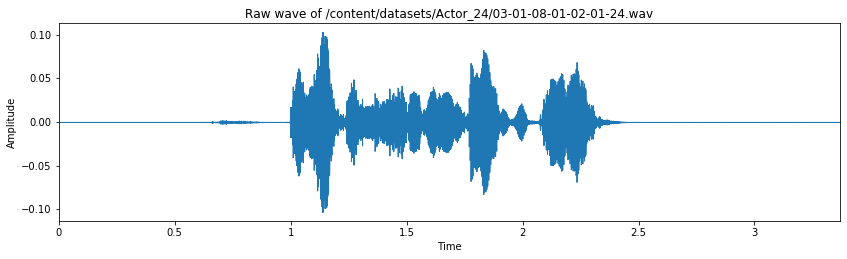

In [0]:
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + filename)
ax1.set_ylabel('Amplitude')
librosa.display.waveplot(samples, sr=sample_rate)



In [0]:
aa , bb = librosa.effects.trim(samples, top_db=30)


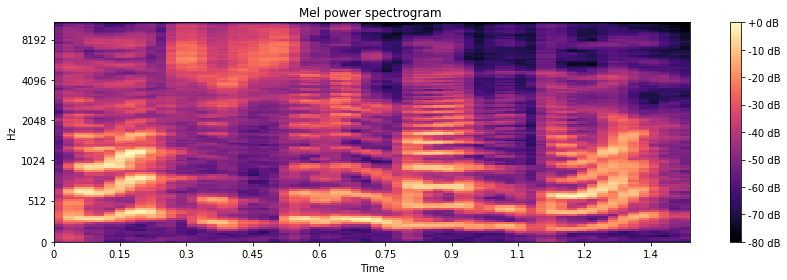

In [0]:
S = librosa.feature.melspectrogram(aa, sr=sample_rate, n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(log_S, sr=sample_rate, x_axis='time', y_axis='mel')
plt.title('Mel power spectrogram ')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

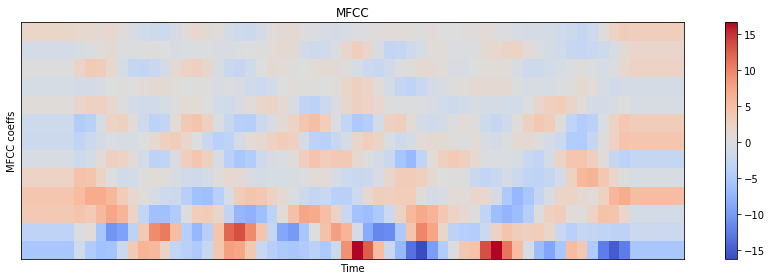

In [0]:

mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=13)

delta2_mfcc = librosa.feature.delta(mfcc, order=2)
plt.figure(figsize=(12, 4))
librosa.display.specshow(delta2_mfcc)
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC')
plt.colorbar()
plt.tight_layout()

In [0]:
data_df.emotion


0       6
1       4
2       5
3       6
4       7
       ..
1435    8
1436    3
1437    2
1438    2
1439    5
Name: emotion, Length: 1440, dtype: object

In [0]:
label8_list = []
for i in range(len(data_df)):
    if data_df.emotion[i] == 1:
        lb = "_neutral"
    elif data_df.emotion[i] == 2:
        lb = "_calm"
    elif data_df.emotion[i] == 3:
        lb = "_happy"
    elif data_df.emotion[i] == 4:
        lb = "_sad"
    elif data_df.emotion[i] == 5:
        lb = "_angry"
    elif data_df.emotion[i] == 6:
        lb = "_fearful"
    elif data_df.emotion[i] == 7:
        lb = "_disgust"
    elif data_df.emotion[i] == 8:
        lb = "_surprised"
    else:
        lb = "_none"
        

    # Add gender to the label 
    label8_list.append(data_df.gender[i]  + lb)
    


In [0]:
def plot_emotion_dist(dist, color_code='#C2185B', title="Plot"):
    tmp_df = pd.DataFrame()
    tmp_df['Emotion'] = list(dist.keys())
    tmp_df['Count'] = list(dist)
    fig, ax = plt.subplots(figsize=(14, 7))
    ax = sns.barplot(x="Emotion", y='Count', color=color_code, data=tmp_df)
    ax.set_title(title)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

,path,source,actor,gender,intensity,statement,repetition,emotion,label
0,/content/datasets/Actor_01/03-01-06-01-01-01-0...,1,1,male,0,0,0,6,male_fearful
1,/content/datasets/Actor_01/03-01-04-02-01-01-0...,1,1,male,1,0,0,4,male_sad
2,/content/datasets/Actor_01/03-01-05-02-01-02-0...,1,1,male,1,0,1,5,male_angry
3,/content/datasets/Actor_01/03-01-06-02-01-01-0...,1,1,male,1,0,0,6,male_fearful
4,/content/datasets/Actor_01/03-01-07-01-02-01-0...,1,1,male,0,1,0,7,male_disgust
...,...,...,...,...,...,...,...,...,...
1435,/content/datasets/Actor_24/03-01-08-01-01-02-2...,1,24,female,0,0,1,8,female_surprised
1436,/content/datasets/Actor_24/03-01-03-02-01-01-2...,1,24,female,1,0,0,3,female_happy
1437,/content/datasets/Actor_24/03-01-02-01-02-02-2...,1,24,female,0,1,1,2,female_calm
1438,/content/datasets/Actor_24/03-01-02-01-02-01-2...,1,24,female,0,1,0,2,female_calm


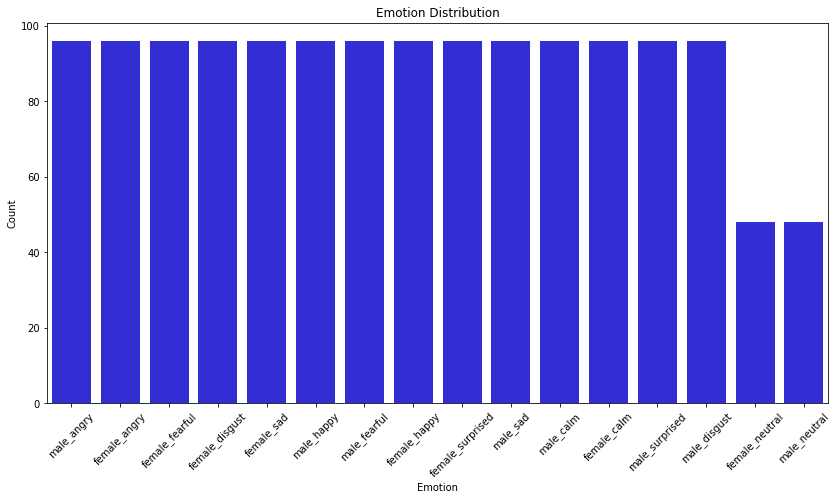

In [0]:
data_df['label'] = label8_list
a = data_df.label.value_counts()
plot_emotion_dist(a, "#1913ee", "Emotion Distribution")
data_df

In [0]:
label9_list = []
for i in range(len(data_df)):
    if data_df.label[i] == "male_neutral":
        lb1 = 0
    elif data_df.label[i] == "male_calm":
        lb1 = 1
    elif data_df.label[i] == "male_happy":
        lb1 = 2
    elif data_df.label[i] == "male_sad":
        lb1 = 3
    elif data_df.label[i] == "male_angry":
        lb1 = 4
    elif data_df.label[i] == "male_fearful":
        lb1 = 5
    elif data_df.label[i] == "male_disgust":
        lb1 = 6
    elif data_df.label[i] == "male_surprised":
        lb1 = 7
    elif data_df.label[i] == "female_neutral":
        lb1 = 8
    elif data_df.label[i] == "female_calm":
        lb1 = 9
    elif data_df.label[i] == "female_happy":
        lb1 = 10
    elif data_df.label[i] == "female_sad":
        lb1 = 11
    elif data_df.label[i] == "female_angry":
        lb1 = 12
    elif data_df.label[i] == "female_fearful":
        lb1 = 13
    elif data_df.label[i] == "female_disgust":
        lb1 = 14
    elif data_df.label[i] == "female_surprised":
        lb1 = 15    
    else:
        lb1 = "_none"
        

    # Add gender to the label 
    label9_list.append(lb1)

,path,source,actor,gender,intensity,statement,repetition,emotion,label,class1
0,/content/datasets/Actor_01/03-01-06-01-01-01-0...,1,1,male,0,0,0,6,male_fearful,5
1,/content/datasets/Actor_01/03-01-04-02-01-01-0...,1,1,male,1,0,0,4,male_sad,3
2,/content/datasets/Actor_01/03-01-05-02-01-02-0...,1,1,male,1,0,1,5,male_angry,4
3,/content/datasets/Actor_01/03-01-06-02-01-01-0...,1,1,male,1,0,0,6,male_fearful,5
4,/content/datasets/Actor_01/03-01-07-01-02-01-0...,1,1,male,0,1,0,7,male_disgust,6
...,...,...,...,...,...,...,...,...,...,...
1435,/content/datasets/Actor_24/03-01-08-01-01-02-2...,1,24,female,0,0,1,8,female_surprised,15
1436,/content/datasets/Actor_24/03-01-03-02-01-01-2...,1,24,female,1,0,0,3,female_happy,10
1437,/content/datasets/Actor_24/03-01-02-01-02-02-2...,1,24,female,0,1,1,2,female_calm,9
1438,/content/datasets/Actor_24/03-01-02-01-02-01-2...,1,24,female,0,1,0,2,female_calm,9


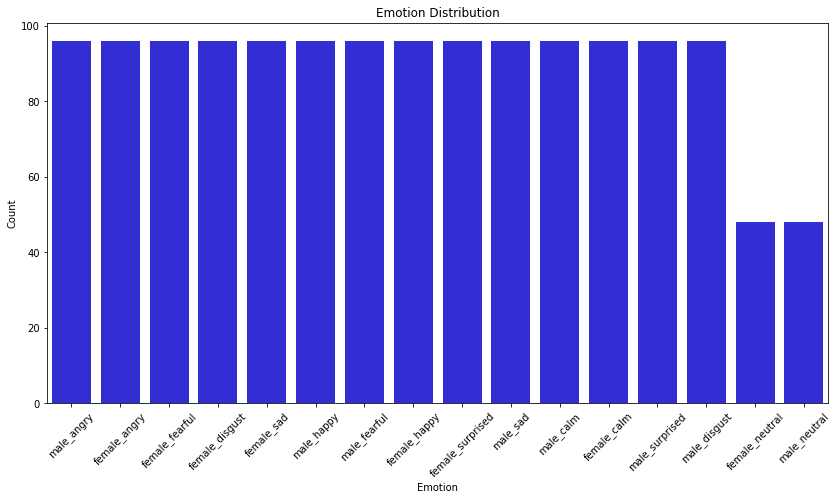

In [0]:
data_df['class1'] = label9_list
a = data_df.label.value_counts()
plot_emotion_dist(a, "#1913ee", "Emotion Distribution")
data_df

In [0]:
data = pd.DataFrame(columns=['feature'])
for i in tqdm(range(len(data_df))):
    X, sample_rate = librosa.load(data_df.path[i], res_type='kaiser_fast',duration=input_duration,sr=22050*2,offset=0.5)
    sample_rate = np.array(sample_rate)
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=25), axis=0)
    feature = mfccs
    data.loc[i] = [(feature)]
    

100%|██████████| 1440/1440 [04:15<00:00,  5.73it/s]


In [0]:
datatest = pd.DataFrame(data['feature'].values.tolist())
labels1 = data_df.label
datatest = pd.concat([datatest,labels1], axis=1)
datatest = datatest.fillna(0)

In [0]:
datatest

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,label
0,-19.270232,-20.323904,-20.724786,-19.987328,-20.593372,-21.142336,-20.400644,-20.708886,-21.452984,-21.130850,-21.907939,-23.504606,-25.139334,-24.952211,-23.680994,-24.911835,-26.596208,-27.690862,-26.997244,-27.663210,-27.345155,-28.880043,-28.754688,-27.153385,-26.225358,-26.563862,-27.559782,-29.649185,-30.074451,-27.572715,-27.329025,-29.633162,-27.604465,-25.235013,-25.589900,-25.715255,-23.421426,-22.002033,-20.333744,-21.419119,...,-30.192430,-31.183815,-29.902711,-30.765331,-30.794544,-27.957071,-27.959140,-30.113143,-31.205630,-31.205630,-31.205630,-31.135274,-31.205630,-31.205630,-31.140075,-30.567026,-30.860978,-31.205630,-31.205630,-31.205630,-31.205630,-31.205630,-31.205630,-31.205630,-31.205630,-31.205630,-31.205630,-30.812149,-30.235781,-31.205630,-31.205630,-31.205630,-31.205630,-31.057124,-31.205630,-29.379475,-26.630441,-26.700194,-29.451529,male_fearful
1,-34.193056,-34.193056,-34.193056,-34.193056,-34.193056,-34.193056,-34.193056,-34.193056,-34.193056,-34.193056,-34.193056,-34.049673,-33.681549,-34.108633,-32.957766,-32.932065,-34.193056,-34.027128,-33.856938,-34.054732,-34.193056,-34.193056,-34.162516,-33.798468,-34.101558,-34.193056,-34.193056,-34.089817,-33.619372,-34.193056,-33.697151,-33.557798,-34.193056,-34.193056,-34.193056,-34.186036,-32.598927,-31.427251,-31.027613,-32.868128,...,-28.578425,-28.027744,-28.636685,-29.290854,-26.670334,-26.783573,-27.173541,-26.951383,-29.152164,-31.367521,-30.999610,-31.874957,-32.207662,-32.187705,-34.011101,-33.913598,-32.107975,-32.083696,-33.111822,-33.742950,-34.193056,-32.510471,-31.953402,-34.193056,-34.193056,-34.193056,-32.787694,-33.877722,-34.193056,-34.056394,-34.193056,-34.193056,-34.193056,-34.193056,-34.193056,-34.193056,-34.193056,-34.193056,-34.193056,male_sad
2,-22.114154,-22.294270,-23.008179,-23.376427,-22.824812,-22.896263,-23.074143,-22.789813,-22.721373,-22.521622,-22.851080,-23.111557,-23.122666,-23.114369,-23.272365,-23.244792,-23.286266,-23.417401,-23.398207,-23.807934,-23.798596,-23.962862,-23.643177,-22.260185,-21.061608,-20.807055,-20.758772,-19.513895,-19.189447,-18.230625,-17.120857,-15.579893,-16.406326,-18.428999,-19.433779,-20.460356,-21.302954,-23.372938,-21.989965,-20.382268,...,-19.559554,-19.834769,-19.622833,-20.090688,-20.422470,-18.733816,-17.281439,-18.151471,-19.040241,-18.380462,-18.141559,-18.227198,-18.205185,-18.591926,-19.373764,-19.664317,-20.240144,-20.361893,-21.376040,-21.967145,-20.356729,-19.143152,-18.777416,-19.185526,-19.915747,-20.981816,-21.603857,-21.293894,-20.974284,-20.937389,-21.776318,-21.825799,-21.936338,-22.187556,-23.091418,-22.867861,-22.702251,-22.810140,-23.381255,male_angry
3,-23.485452,-23.107996,-22.176963,-21.423119,-22.017377,-22.044640,-21.926186,-21.232818,-22.138719,-23.860718,-24.392311,-22.462134,-21.370654,-21.425639,-22.223827,-21.379001,-20.747335,-21.715174,-24.534485,-26.112136,-24.578422,-22.640032,-22.813194,-21.398397,-20.613498,-16.852634,-14.854302,-15.333972,-14.584897,-13.171269,-12.727882,-12.489028,-12.459122,-13.388868,-15.561130,-17.893561,-15.755460,-12.648778,-10.431125,-9.836183,...,-21.455881,-20.754574,-21.963953,-20.549233,-20.676303,-21.356896,-17.769328,-14.306879,-14.480455,-17.751659,-18.596429,-17.977362,-18.455918,-18.111698,-17.582250,-18.973372,-16.355540,-16.332658,-18.169713,-17.836721,-19.225194,-19.935436,-20.128815,-18.860520,-17.235066,-17.328389,-16.730782,-16.658967,-18.153206,-15.082284,-12.144402,-12.253197,-14.802129,-16.667624,-16.780518,-18.287548,-18.863814,-13.088386,-8.207407,male_fearful
4,-36.092871,-36.092871,-36.092871,-36.092871,-36.092871,-36.092871,-36.092871,-36.092871,-36.092871,-36.092871,-36.092871,-36.092871,-36.092871,-36.092871,-36.092871,-36.092871,-

In [0]:
df3 = pd.DataFrame(data['feature'].values.tolist())
labels = data_df.label
df3.head()
newdf = pd.concat([df3,labels], axis=1)
rnewdf = newdf.rename(index=str, columns={"0": "label"})
rnewdf.isnull().sum().sum()
rnewdf = rnewdf.fillna(0)
rnewdf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,label
0,-19.270232,-20.323904,-20.724786,-19.987328,-20.593372,-21.142336,-20.400644,-20.708886,-21.452984,-21.130850,-21.907939,-23.504606,-25.139334,-24.952211,-23.680994,-24.911835,-26.596208,-27.690862,-26.997244,-27.663210,-27.345155,-28.880043,-28.754688,-27.153385,-26.225358,-26.563862,-27.559782,-29.649185,-30.074451,-27.572715,-27.329025,-29.633162,-27.604465,-25.235013,-25.589900,-25.715255,-23.421426,-22.002033,-20.333744,-21.419119,...,-30.192430,-31.183815,-29.902711,-30.765331,-30.794544,-27.957071,-27.959140,-30.113143,-31.205630,-31.205630,-31.205630,-31.135274,-31.205630,-31.205630,-31.140075,-30.567026,-30.860978,-31.205630,-31.205630,-31.205630,-31.205630,-31.205630,-31.205630,-31.205630,-31.205630,-31.205630,-31.205630,-30.812149,-30.235781,-31.205630,-31.205630,-31.205630,-31.205630,-31.057124,-31.205630,-29.379475,-26.630441,-26.700194,-29.451529,male_fearful
1,-34.193056,-34.193056,-34.193056,-34.193056,-34.193056,-34.193056,-34.193056,-34.193056,-34.193056,-34.193056,-34.193056,-34.049673,-33.681549,-34.108633,-32.957766,-32.932065,-34.193056,-34.027128,-33.856938,-34.054732,-34.193056,-34.193056,-34.162516,-33.798468,-34.101558,-34.193056,-34.193056,-34.089817,-33.619372,-34.193056,-33.697151,-33.557798,-34.193056,-34.193056,-34.193056,-34.186036,-32.598927,-31.427251,-31.027613,-32.868128,...,-28.578425,-28.027744,-28.636685,-29.290854,-26.670334,-26.783573,-27.173541,-26.951383,-29.152164,-31.367521,-30.999610,-31.874957,-32.207662,-32.187705,-34.011101,-33.913598,-32.107975,-32.083696,-33.111822,-33.742950,-34.193056,-32.510471,-31.953402,-34.193056,-34.193056,-34.193056,-32.787694,-33.877722,-34.193056,-34.056394,-34.193056,-34.193056,-34.193056,-34.193056,-34.193056,-34.193056,-34.193056,-34.193056,-34.193056,male_sad
2,-22.114154,-22.294270,-23.008179,-23.376427,-22.824812,-22.896263,-23.074143,-22.789813,-22.721373,-22.521622,-22.851080,-23.111557,-23.122666,-23.114369,-23.272365,-23.244792,-23.286266,-23.417401,-23.398207,-23.807934,-23.798596,-23.962862,-23.643177,-22.260185,-21.061608,-20.807055,-20.758772,-19.513895,-19.189447,-18.230625,-17.120857,-15.579893,-16.406326,-18.428999,-19.433779,-20.460356,-21.302954,-23.372938,-21.989965,-20.382268,...,-19.559554,-19.834769,-19.622833,-20.090688,-20.422470,-18.733816,-17.281439,-18.151471,-19.040241,-18.380462,-18.141559,-18.227198,-18.205185,-18.591926,-19.373764,-19.664317,-20.240144,-20.361893,-21.376040,-21.967145,-20.356729,-19.143152,-18.777416,-19.185526,-19.915747,-20.981816,-21.603857,-21.293894,-20.974284,-20.937389,-21.776318,-21.825799,-21.936338,-22.187556,-23.091418,-22.867861,-22.702251,-22.810140,-23.381255,male_angry
3,-23.485452,-23.107996,-22.176963,-21.423119,-22.017377,-22.044640,-21.926186,-21.232818,-22.138719,-23.860718,-24.392311,-22.462134,-21.370654,-21.425639,-22.223827,-21.379001,-20.747335,-21.715174,-24.534485,-26.112136,-24.578422,-22.640032,-22.813194,-21.398397,-20.613498,-16.852634,-14.854302,-15.333972,-14.584897,-13.171269,-12.727882,-12.489028,-12.459122,-13.388868,-15.561130,-17.893561,-15.755460,-12.648778,-10.431125,-9.836183,...,-21.455881,-20.754574,-21.963953,-20.549233,-20.676303,-21.356896,-17.769328,-14.306879,-14.480455,-17.751659,-18.596429,-17.977362,-18.455918,-18.111698,-17.582250,-18.973372,-16.355540,-16.332658,-18.169713,-17.836721,-19.225194,-19.935436,-20.128815,-18.860520,-17.235066,-17.328389,-16.730782,-16.658967,-18.153206,-15.082284,-12.144402,-12.253197,-14.802129,-16.667624,-16.780518,-18.287548,-18.863814,-13.088386,-8.207407,male_fearful
4,-36.092871,-36.092871,-36.092871,-36.092871,-36.092871,-36.092871,-36.092871,-36.092871,-36.092871,-36.092871,-36.092871,-36.092871,-36.092871,-36.092871,-36.092871,-36.092871,-

In [0]:
def plot_time_series(data):
    """
    Plot the Audio Frequency.
    """
    fig = plt.figure(figsize=(14, 8))
    plt.title('Raw wave ')
    plt.ylabel('Amplitude')
    plt.plot(np.linspace(0, 1, len(data)), data)
    plt.show()


def noise(data):
    """
    Adding White Noise.
    """
    
    noise_amp = 0.005*np.random.uniform()*np.amax(data)
    data = data.astype('float64') + noise_amp * np.random.normal(size=data.shape[0])
    return data
    
def shift(data):
    """
    Random Shifting.
    """
    s_range = int(np.random.uniform(low=-5, high = 5)*500)
    return np.roll(data, s_range)
    
def stretch(data, rate=0.8):
    """
    Streching the Sound.
    """
    data = librosa.effects.time_stretch(data, rate)
    return data
    
def pitch(data, sample_rate):
    """
    Pitch Tuning.
    """
    bins_per_octave = 12
    pitch_pm = 2
    pitch_change =  pitch_pm * 2*(np.random.uniform())   
    data = librosa.effects.pitch_shift(data.astype('float64'), 
                                      sample_rate, n_steps=pitch_change, 
                                      bins_per_octave=bins_per_octave)
    return data
    
def dyn_change(data):
    """
    Random Value Change.
    """
    dyn_change = np.random.uniform(low=1.5,high=3)
    return (data * dyn_change)
    
def speedNpitch(data):
    """
    peed and Pitch Tuning.
    """
    # you can change low and high here
    length_change = np.random.uniform(low=0.8, high = 1)
    speed_fac = 1.0  / length_change
    tmp = np.interp(np.arange(0,len(data),speed_fac),np.arange(0,len(data)),data)
    minlen = min(data.shape[0], tmp.shape[0])
    data *= 0
    data[0:minlen] = tmp[0:minlen]
    return data

In [0]:
data_df

,path,source,actor,gender,intensity,statement,repetition,emotion,label,class1
0,/content/datasets/Actor_01/03-01-06-01-01-01-0...,1,1,male,0,0,0,6,male_fearful,5
1,/content/datasets/Actor_01/03-01-04-02-01-01-0...,1,1,male,1,0,0,4,male_sad,3
2,/content/datasets/Actor_01/03-01-05-02-01-02-0...,1,1,male,1,0,1,5,male_angry,4
3,/content/datasets/Actor_01/03-01-06-02-01-01-0...,1,1,male,1,0,0,6,male_fearful,5
4,/content/datasets/Actor_01/03-01-07-01-02-01-0...,1,1,male,0,1,0,7,male_disgust,6
...,...,...,...,...,...,...,...,...,...,...
1435,/content/datasets/Actor_24/03-01-08-01-01-02-2...,1,24,female,0,0,1,8,female_surprised,15
1436,/content/datasets/Actor_24/03-01-03-02-01-01-2...,1,24,female,1,0,0,3,female_happy,10
1437,/content/datasets/Actor_24/03-01-02-01-02-02-2...,1,24,female,0,1,1,2,female_calm,9
1438,/content/datasets/Actor_24/03-01-02-01-02-01-2...,1,24,female,0,1,0,2,female_calm,9


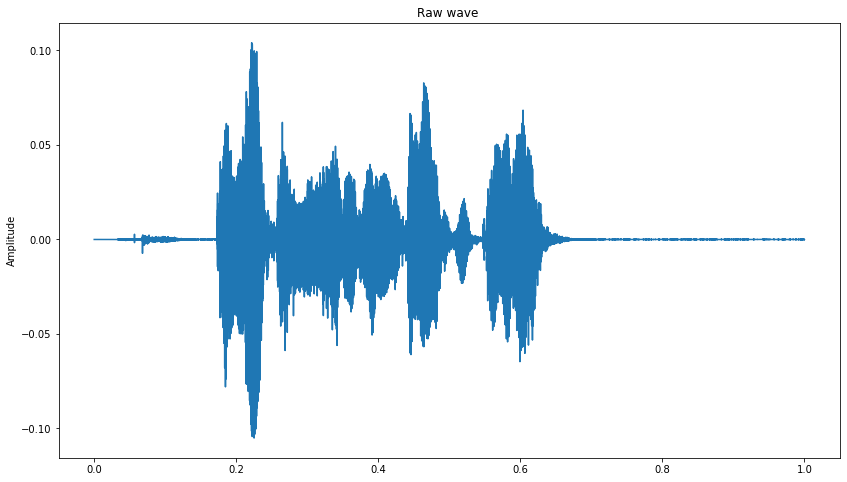

In [0]:
X, sample_rate = librosa.load(data_df.path[1400], res_type='kaiser_fast',duration=4,sr=22050*2,offset=0.5)
plot_time_series(X)
ipd.Audio(X, rate=sample_rate)

In [29]:
syn_data1 = pd.DataFrame(columns=['feature', 'label'])
for i in tqdm(range(len(data_df))):
    X, sample_rate = librosa.load(data_df.path[i], res_type='kaiser_fast',duration=input_duration,sr=22050*2,offset=0.5)
    if data_df.label[i]:
        X = noise(X)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=16), axis=0)
        feature = mfccs
        a = random.uniform(0, 1)
        syn_data1.loc[i] = [feature, data_df.label[i]]

100%|██████████| 1440/1440 [04:21<00:00,  5.42it/s]


In [30]:
syn_data2 = pd.DataFrame(columns=['feature', 'label'])
for i in tqdm(range(len(data_df))):
    X, sample_rate = librosa.load(data_df.path[i], res_type='kaiser_fast',duration=input_duration,sr=22050*2,offset=0.5)
    if data_df.label[i]:
        X = pitch(X, sample_rate)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=16), axis=0)
        feature = mfccs
        a = random.uniform(0, 1)
        syn_data2.loc[i] = [feature, data_df.label[i]]

100%|██████████| 1440/1440 [09:28<00:00,  2.48it/s]


In [31]:
syn_data2


,feature,label
0,"[-34.65570333983155, -36.09801928702452, -37.6...",male_fearful
1,"[-55.823910000560545, -55.823910000560545, -55...",male_sad
2,"[-35.210771837241595, -35.759604165536665, -36...",male_angry
3,"[-37.94691164778145, -38.339303095655566, -37....",male_fearful
4,"[-58.393328393882776, -58.393328393882776, -58...",male_disgust
...,...,...
1435,"[-48.206394610476714, -48.206394610476714, -48...",female_surprised
1436,"[-48.289051187718066, -48.289051187718066, -48...",female_happy
1437,"[-53.61647232760043, -54.75789705340314, -55.4...",female_calm
1438,"[-60.510635597087685, -60.6526697884469, -59.9...",female_calm


In [0]:
syn_data1 = syn_data1.reset_index(drop=True)
syn_data2 = syn_data2.reset_index(drop=True)

In [0]:
datate=data.reset_index(drop=True)

In [34]:
df4 = pd.DataFrame(syn_data1['feature'].values.tolist())
labels4 = syn_data1.label
syndf1 = pd.concat([df4,labels4], axis=1)
syndf1 = syndf1.rename(index=str, columns={"0": "class1"})
syndf1 = syndf1.fillna(259)
(syndf1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,label
0,-34.510946,-36.148695,-37.011812,-34.777745,-34.453086,-36.245895,-36.929214,-37.234125,-37.638665,-37.419941,-39.104911,-40.842013,-42.468181,-42.167537,-41.299012,-42.580642,-44.172461,-45.060413,-44.670010,-45.973941,-45.635422,-46.681779,-46.451807,-45.845502,-44.850588,-44.392272,-45.718682,-48.035935,-48.568795,-45.853438,-44.694276,-47.210471,-44.851566,-42.438339,-43.214626,-44.225420,-41.212992,-36.587843,-33.714289,-36.375241,...,-47.542370,-48.725971,-46.890066,-48.081308,-48.034596,-44.774174,-44.501103,-47.168205,-48.758801,-48.758801,-48.712642,-48.650579,-48.758801,-48.758801,-48.223318,-47.910601,-48.378689,-48.758801,-48.758801,-48.758801,-48.758801,-48.758801,-48.758801,-48.758801,-48.758801,-48.758801,-48.758801,-48.277948,-47.531361,-48.758801,-48.758801,-48.758801,-48.758801,-48.663581,-48.758801,-46.825595,-42.887537,-43.348405,-46.741313,male_fearful
1,-46.175167,-45.838221,-45.676910,-48.934049,-49.068826,-47.588463,-48.008457,-45.360466,-46.425149,-46.804082,-45.595506,-44.128798,-46.848735,-50.020509,-48.743498,-47.232066,-45.433435,-45.488852,-47.745001,-47.878948,-48.009220,-46.485106,-45.684813,-46.383180,-46.618941,-47.404064,-46.803961,-47.536729,-46.996840,-44.730598,-44.313695,-45.235778,-47.919097,-49.337171,-47.809117,-45.242653,-43.778868,-45.101244,-45.287960,-45.453399,...,-42.246442,-42.113530,-41.989808,-42.801036,-39.600694,-40.096326,-42.247263,-42.003872,-44.619957,-45.193723,-43.613941,-45.613124,-45.729871,-44.703203,-45.549219,-45.593626,-47.050650,-47.447867,-46.701249,-45.057469,-44.514503,-47.452003,-47.577873,-46.527538,-45.607592,-45.821754,-46.130396,-46.297183,-46.952324,-46.840212,-46.674812,-49.399079,-50.225449,-48.591797,-48.064028,-48.897228,-46.756074,-45.977422,-46.455775,male_sad
2,-32.094125,-31.820729,-32.361649,-29.596294,-29.842518,-28.956560,-30.196369,-28.404959,-28.523390,-28.662558,-27.685457,-28.836010,-28.171510,-28.395839,-28.763975,-27.898807,-29.452215,-30.254536,-30.732147,-30.762309,-29.080737,-27.614515,-29.916819,-28.866753,-27.912082,-28.517826,-27.341423,-26.036753,-27.303779,-28.652321,-27.479583,-24.938567,-25.760173,-26.800949,-28.897427,-28.077979,-28.409314,-28.733534,-29.183635,-28.852559,...,-20.743792,-21.726191,-21.293307,-20.382052,-21.257806,-21.387005,-21.250533,-22.780321,-22.818720,-19.740057,-18.267445,-18.848340,-19.143560,-19.120999,-19.565350,-20.180186,-19.447212,-21.629445,-24.361932,-24.179882,-22.587762,-22.152623,-22.122698,-21.806530,-23.406874,-25.055611,-26.574792,-27.866755,-26.977389,-26.410212,-25.646264,-25.111980,-25.851984,-26.901893,-26.534329,-27.386774,-28.671601,-28.141289,-29.431864,male_angry
3,-29.350974,-28.575875,-29.106260,-28.113684,-27.243734,-29.372070,-31.643532,-31.759647,-30.213988,-29.364436,-29.578569,-30.256922,-30.684115,-31.115488,-29.031847,-26.419218,-27.198078,-29.744012,-30.262022,-27.565024,-26.179488,-29.379241,-30.683906,-28.973545,-27.734282,-27.661787,-26.201224,-25.949761,-24.858078,-23.699176,-22.806050,-22.701985,-21.922672,-22.131353,-24.392821,-26.257523,-24.420894,-22.255670,-19.393033,-17.712897,...,-22.731882,-22.973328,-23.478847,-21.344253,-21.330306,-20.273162,-18.860856,-16.398159,-16.696837,-20.716224,-21.434542,-20.522671,-21.271170,-21.833133,-21.859911,-23.204218,-20.339816,-20.798876,-21.503051,-20.393666,-20.467980,-20.498720,-22.161344,-22.463668,-21.286831,-20.421686,-20.982138,-19.911086,-20.787892,-18.486388,-15.271612,-15.581571,-17.318788,-18.157360,-19.908732,-19.328523,-18.337883,-16.055098,-12.966336,male_fearful
4,-46.007914,-45.006242,-46.267198,-45.794588,-46.349930,-47.514655,-45.022402,-44.997759,-44.198129,-43.122811,-45.666119,-44.575150,-45.090258,-43.346471,-42.878176,-44.034473

In [35]:
df4 = pd.DataFrame(syn_data2['feature'].values.tolist())
labels4 = syn_data2.label
syndf2 = pd.concat([df4,labels4], axis=1)
syndf2 = syndf2.rename(index=str, columns={"0": "class1"})
syndf2 = syndf2.fillna(0)
syndf2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,label
0,-34.655703,-36.098019,-37.607415,-38.319785,-37.752159,-37.909701,-38.476366,-39.565204,-39.437768,-39.741045,-42.196214,-42.677575,-43.403214,-42.707610,-42.978665,-45.672666,-48.048394,-47.364686,-46.775580,-46.274421,-46.686563,-47.652008,-46.656253,-46.058580,-46.774015,-47.534667,-49.314702,-49.590337,-47.542623,-46.112075,-47.380906,-47.186940,-44.270840,-44.640227,-46.861964,-45.191857,-42.538615,-39.173859,-38.405555,-40.782542,...,-47.420051,-48.630963,-49.133619,-49.164679,-48.569387,-46.802179,-46.378645,-48.089695,-49.412946,-49.641843,-49.641843,-49.641843,-49.641843,-49.641843,-49.611014,-49.469061,-49.641843,-49.641843,-49.641843,-49.641843,-49.641843,-49.641843,-49.641843,-49.641843,-49.641843,-49.641843,-49.641843,-49.641843,-49.641843,-49.641843,-49.641843,-49.641843,-49.641843,-49.641843,-49.351006,-46.901482,-46.621892,-46.561938,-47.035073,male_fearful
1,-55.823910,-55.823910,-55.823910,-55.738895,-55.823910,-55.823910,-55.823910,-55.823910,-55.823910,-55.823910,-55.823910,-55.491744,-55.176720,-55.399370,-55.648320,-55.150209,-55.193923,-55.687281,-54.585861,-55.274234,-55.823910,-55.823910,-55.823910,-55.619247,-55.486469,-55.770263,-55.823910,-55.646395,-55.384019,-55.661234,-55.831073,-55.808226,-55.514679,-55.781941,-55.829617,-55.639498,-54.144982,-52.453663,-52.855206,-54.473502,...,-49.353488,-50.154527,-51.633865,-48.833133,-46.195840,-45.577085,-44.457981,-44.992884,-47.243819,-52.760924,-52.529944,-53.407044,-53.442925,-54.379809,-55.089940,-55.554226,-54.853649,-55.274002,-54.265500,-55.074995,-55.823910,-54.521573,-52.577622,-54.767596,-55.823910,-55.823910,-55.722862,-54.795094,-55.785170,-55.745593,-55.654671,-55.823910,-55.823910,-55.823910,-55.823910,-55.823910,-55.823910,-55.823910,-55.823910,male_sad
2,-35.210772,-35.759604,-36.958125,-37.719632,-37.959027,-36.850379,-37.214393,-37.118431,-36.906024,-36.841899,-37.985204,-38.550698,-38.525520,-37.718347,-38.411702,-38.933436,-38.960448,-39.872105,-40.176108,-40.433460,-40.033634,-40.195047,-38.875027,-38.725539,-35.300134,-34.359803,-35.203362,-32.673548,-33.008994,-33.219912,-29.778711,-28.609020,-29.874075,-30.937410,-33.125175,-35.042434,-36.511207,-37.783129,-37.256684,-34.838455,...,-28.730080,-28.652840,-29.066604,-29.200474,-28.787032,-27.881504,-27.650369,-28.191780,-28.220822,-28.248958,-28.374566,-29.142369,-30.909286,-30.917489,-30.540588,-29.975954,-30.886331,-32.302703,-34.040183,-33.179068,-31.498287,-30.974071,-31.663023,-32.931130,-33.821345,-35.945475,-35.416422,-35.146147,-34.560464,-33.379976,-34.560241,-36.779919,-37.057981,-36.648151,-37.645380,-38.605807,-38.080179,-37.834132,-38.382267,male_angry
3,-37.946912,-38.339303,-37.671525,-36.991817,-37.243633,-38.404296,-38.448383,-37.069843,-36.718966,-39.118573,-40.306373,-38.448203,-37.278287,-36.900238,-36.067123,-36.063930,-37.966950,-38.824778,-40.309220,-43.847574,-41.740342,-40.261225,-39.429654,-39.853470,-36.055428,-33.096455,-31.795964,-31.524796,-29.244026,-27.582961,-28.073453,-27.863164,-26.868275,-27.628085,-28.556582,-27.482979,-25.847038,-24.172339,-24.445340,-26.859817,...,-28.008889,-29.661013,-29.367136,-28.853933,-27.080368,-27.203161,-23.031932,-20.767474,-20.347794,-22.737451,-25.698262,-26.606091,-26.939464,-27.112311,-27.364327,-26.790994,-26.137682,-25.749168,-26.676033,-26.751962,-26.715640,-27.676022,-28.468070,-26.210803,-24.969963,-25.223847,-24.612754,-24.229015,-24.431319,-23.537719,-19.321670,-18.257125,-20.369752,-24.142911,-24.043508,-22.549916,-21.442359,-18.620884,-17.295476,male_fearful
4,-58.393328,-58.393328,-58.393328,-58.393328,-58.393328,-58.393328,-58.393328,-58.393328,-58.393328,-58.393328,-58.393328,-58.393328,-58.393328,-58.393328,-58.393328,-58.393328

In [36]:
combined_df = pd.concat([rnewdf, syndf1, syndf2], ignore_index=True)
combined_df = combined_df.fillna(0)
combined_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,label
0,-19.270232,-20.323904,-20.724786,-19.987328,-20.593372,-21.142336,-20.400644,-20.708886,-21.452984,-21.130850,-21.907939,-23.504606,-25.139334,-24.952211,-23.680994,-24.911835,-26.596208,-27.690862,-26.997244,-27.663210,-27.345155,-28.880043,-28.754688,-27.153385,-26.225358,-26.563862,-27.559782,-29.649185,-30.074451,-27.572715,-27.329025,-29.633162,-27.604465,-25.235013,-25.589900,-25.715255,-23.421426,-22.002033,-20.333744,-21.419119,...,-30.192430,-31.183815,-29.902711,-30.765331,-30.794544,-27.957071,-27.959140,-30.113143,-31.205630,-31.205630,-31.205630,-31.135274,-31.205630,-31.205630,-31.140075,-30.567026,-30.860978,-31.205630,-31.205630,-31.205630,-31.205630,-31.205630,-31.205630,-31.205630,-31.205630,-31.205630,-31.205630,-30.812149,-30.235781,-31.205630,-31.205630,-31.205630,-31.205630,-31.057124,-31.205630,-29.379475,-26.630441,-26.700194,-29.451529,male_fearful
1,-34.193056,-34.193056,-34.193056,-34.193056,-34.193056,-34.193056,-34.193056,-34.193056,-34.193056,-34.193056,-34.193056,-34.049673,-33.681549,-34.108633,-32.957766,-32.932065,-34.193056,-34.027128,-33.856938,-34.054732,-34.193056,-34.193056,-34.162516,-33.798468,-34.101558,-34.193056,-34.193056,-34.089817,-33.619372,-34.193056,-33.697151,-33.557798,-34.193056,-34.193056,-34.193056,-34.186036,-32.598927,-31.427251,-31.027613,-32.868128,...,-28.578425,-28.027744,-28.636685,-29.290854,-26.670334,-26.783573,-27.173541,-26.951383,-29.152164,-31.367521,-30.999610,-31.874957,-32.207662,-32.187705,-34.011101,-33.913598,-32.107975,-32.083696,-33.111822,-33.742950,-34.193056,-32.510471,-31.953402,-34.193056,-34.193056,-34.193056,-32.787694,-33.877722,-34.193056,-34.056394,-34.193056,-34.193056,-34.193056,-34.193056,-34.193056,-34.193056,-34.193056,-34.193056,-34.193056,male_sad
2,-22.114154,-22.294270,-23.008179,-23.376427,-22.824812,-22.896263,-23.074143,-22.789813,-22.721373,-22.521622,-22.851080,-23.111557,-23.122666,-23.114369,-23.272365,-23.244792,-23.286266,-23.417401,-23.398207,-23.807934,-23.798596,-23.962862,-23.643177,-22.260185,-21.061608,-20.807055,-20.758772,-19.513895,-19.189447,-18.230625,-17.120857,-15.579893,-16.406326,-18.428999,-19.433779,-20.460356,-21.302954,-23.372938,-21.989965,-20.382268,...,-19.559554,-19.834769,-19.622833,-20.090688,-20.422470,-18.733816,-17.281439,-18.151471,-19.040241,-18.380462,-18.141559,-18.227198,-18.205185,-18.591926,-19.373764,-19.664317,-20.240144,-20.361893,-21.376040,-21.967145,-20.356729,-19.143152,-18.777416,-19.185526,-19.915747,-20.981816,-21.603857,-21.293894,-20.974284,-20.937389,-21.776318,-21.825799,-21.936338,-22.187556,-23.091418,-22.867861,-22.702251,-22.810140,-23.381255,male_angry
3,-23.485452,-23.107996,-22.176963,-21.423119,-22.017377,-22.044640,-21.926186,-21.232818,-22.138719,-23.860718,-24.392311,-22.462134,-21.370654,-21.425639,-22.223827,-21.379001,-20.747335,-21.715174,-24.534485,-26.112136,-24.578422,-22.640032,-22.813194,-21.398397,-20.613498,-16.852634,-14.854302,-15.333972,-14.584897,-13.171269,-12.727882,-12.489028,-12.459122,-13.388868,-15.561130,-17.893561,-15.755460,-12.648778,-10.431125,-9.836183,...,-21.455881,-20.754574,-21.963953,-20.549233,-20.676303,-21.356896,-17.769328,-14.306879,-14.480455,-17.751659,-18.596429,-17.977362,-18.455918,-18.111698,-17.582250,-18.973372,-16.355540,-16.332658,-18.169713,-17.836721,-19.225194,-19.935436,-20.128815,-18.860520,-17.235066,-17.328389,-16.730782,-16.658967,-18.153206,-15.082284,-12.144402,-12.253197,-14.802129,-16.667624,-16.780518,-18.287548,-18.863814,-13.088386,-8.207407,male_fearful
4,-36.092871,-36.092871,-36.092871,-36.092871,-36.092871,-36.092871,-36.092871,-36.092871,-36.092871,-36.092871,-36.092871,-36.092871,-36.092871,-36.092871,-36.092871,-36.092871,-

In [0]:
#combined_df=datatest

In [38]:
combined_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,label
0,-19.270232,-20.323904,-20.724786,-19.987328,-20.593372,-21.142336,-20.400644,-20.708886,-21.452984,-21.130850,-21.907939,-23.504606,-25.139334,-24.952211,-23.680994,-24.911835,-26.596208,-27.690862,-26.997244,-27.663210,-27.345155,-28.880043,-28.754688,-27.153385,-26.225358,-26.563862,-27.559782,-29.649185,-30.074451,-27.572715,-27.329025,-29.633162,-27.604465,-25.235013,-25.589900,-25.715255,-23.421426,-22.002033,-20.333744,-21.419119,...,-30.192430,-31.183815,-29.902711,-30.765331,-30.794544,-27.957071,-27.959140,-30.113143,-31.205630,-31.205630,-31.205630,-31.135274,-31.205630,-31.205630,-31.140075,-30.567026,-30.860978,-31.205630,-31.205630,-31.205630,-31.205630,-31.205630,-31.205630,-31.205630,-31.205630,-31.205630,-31.205630,-30.812149,-30.235781,-31.205630,-31.205630,-31.205630,-31.205630,-31.057124,-31.205630,-29.379475,-26.630441,-26.700194,-29.451529,male_fearful
1,-34.193056,-34.193056,-34.193056,-34.193056,-34.193056,-34.193056,-34.193056,-34.193056,-34.193056,-34.193056,-34.193056,-34.049673,-33.681549,-34.108633,-32.957766,-32.932065,-34.193056,-34.027128,-33.856938,-34.054732,-34.193056,-34.193056,-34.162516,-33.798468,-34.101558,-34.193056,-34.193056,-34.089817,-33.619372,-34.193056,-33.697151,-33.557798,-34.193056,-34.193056,-34.193056,-34.186036,-32.598927,-31.427251,-31.027613,-32.868128,...,-28.578425,-28.027744,-28.636685,-29.290854,-26.670334,-26.783573,-27.173541,-26.951383,-29.152164,-31.367521,-30.999610,-31.874957,-32.207662,-32.187705,-34.011101,-33.913598,-32.107975,-32.083696,-33.111822,-33.742950,-34.193056,-32.510471,-31.953402,-34.193056,-34.193056,-34.193056,-32.787694,-33.877722,-34.193056,-34.056394,-34.193056,-34.193056,-34.193056,-34.193056,-34.193056,-34.193056,-34.193056,-34.193056,-34.193056,male_sad
2,-22.114154,-22.294270,-23.008179,-23.376427,-22.824812,-22.896263,-23.074143,-22.789813,-22.721373,-22.521622,-22.851080,-23.111557,-23.122666,-23.114369,-23.272365,-23.244792,-23.286266,-23.417401,-23.398207,-23.807934,-23.798596,-23.962862,-23.643177,-22.260185,-21.061608,-20.807055,-20.758772,-19.513895,-19.189447,-18.230625,-17.120857,-15.579893,-16.406326,-18.428999,-19.433779,-20.460356,-21.302954,-23.372938,-21.989965,-20.382268,...,-19.559554,-19.834769,-19.622833,-20.090688,-20.422470,-18.733816,-17.281439,-18.151471,-19.040241,-18.380462,-18.141559,-18.227198,-18.205185,-18.591926,-19.373764,-19.664317,-20.240144,-20.361893,-21.376040,-21.967145,-20.356729,-19.143152,-18.777416,-19.185526,-19.915747,-20.981816,-21.603857,-21.293894,-20.974284,-20.937389,-21.776318,-21.825799,-21.936338,-22.187556,-23.091418,-22.867861,-22.702251,-22.810140,-23.381255,male_angry
3,-23.485452,-23.107996,-22.176963,-21.423119,-22.017377,-22.044640,-21.926186,-21.232818,-22.138719,-23.860718,-24.392311,-22.462134,-21.370654,-21.425639,-22.223827,-21.379001,-20.747335,-21.715174,-24.534485,-26.112136,-24.578422,-22.640032,-22.813194,-21.398397,-20.613498,-16.852634,-14.854302,-15.333972,-14.584897,-13.171269,-12.727882,-12.489028,-12.459122,-13.388868,-15.561130,-17.893561,-15.755460,-12.648778,-10.431125,-9.836183,...,-21.455881,-20.754574,-21.963953,-20.549233,-20.676303,-21.356896,-17.769328,-14.306879,-14.480455,-17.751659,-18.596429,-17.977362,-18.455918,-18.111698,-17.582250,-18.973372,-16.355540,-16.332658,-18.169713,-17.836721,-19.225194,-19.935436,-20.128815,-18.860520,-17.235066,-17.328389,-16.730782,-16.658967,-18.153206,-15.082284,-12.144402,-12.253197,-14.802129,-16.667624,-16.780518,-18.287548,-18.863814,-13.088386,-8.207407,male_fearful
4,-36.092871,-36.092871,-36.092871,-36.092871,-36.092871,-36.092871,-36.092871,-36.092871,-36.092871,-36.092871,-36.092871,-36.092871,-36.092871,-36.092871,-36.092871,-36.092871,-

In [0]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
X = combined_df.drop(['label'], axis=1)
y = combined_df.label

#X = combined_df.drop(['label'], axis=1)
#y = combined_df.label


X, X_f_test, y, y_f_test = train_test_split(X, y, test_size=0.10)
xxx = StratifiedShuffleSplit(1, test_size=0.2, random_state=12)
for train_index, test_index in xxx.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [0]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
X_f_test=np.array(X_f_test)
y_f_test=np.array(y_f_test)
lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

In [41]:
y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [42]:
print(len(X_train))
print(len(y_train))
print(len(y_test))
print(len(X_test))
print(len(X_f_test))
print(len(y_f_test))

3110
3110
778
778
432
432


In [43]:
data_df


,path,source,actor,gender,intensity,statement,repetition,emotion,label,class1
0,/content/datasets/Actor_01/03-01-06-01-01-01-0...,1,1,male,0,0,0,6,male_fearful,5
1,/content/datasets/Actor_01/03-01-04-02-01-01-0...,1,1,male,1,0,0,4,male_sad,3
2,/content/datasets/Actor_01/03-01-05-02-01-02-0...,1,1,male,1,0,1,5,male_angry,4
3,/content/datasets/Actor_01/03-01-06-02-01-01-0...,1,1,male,1,0,0,6,male_fearful,5
4,/content/datasets/Actor_01/03-01-07-01-02-01-0...,1,1,male,0,1,0,7,male_disgust,6
...,...,...,...,...,...,...,...,...,...,...
1435,/content/datasets/Actor_24/03-01-08-01-01-02-2...,1,24,female,0,0,1,8,female_surprised,15
1436,/content/datasets/Actor_24/03-01-03-02-01-01-2...,1,24,female,1,0,0,3,female_happy,10
1437,/content/datasets/Actor_24/03-01-02-01-02-02-2...,1,24,female,0,1,1,2,female_calm,9
1438,/content/datasets/Actor_24/03-01-02-01-02-01-2...,1,24,female,0,1,0,2,female_calm,9


In [44]:
X_train

array([[-62.67018736, -62.67018736, -62.67018736, ..., -50.89918777,
        -51.085946  , -52.87632315],
       [-26.87627539, -26.87627539, -26.87627539, ...,   0.        ,
          0.        ,   0.        ],
       [-42.82431903, -42.36502035, -43.05110314, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [-37.50126764, -38.02133711, -38.7680497 , ..., -47.63336415,
        -48.52457549, -45.65632763],
       [-33.05905319, -32.83181942, -32.481964  , ..., -29.23445816,
        -28.48919707, -28.62867828],
       [-31.59738103, -31.56777412, -31.78980432, ..., -32.49987069,
        -32.5014442 , -32.49987069]])

In [45]:
X_train.shape

(3110, 259)

In [0]:


x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [0]:
from keras import backend as K

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


def fscore(y_true, y_pred):
    if K.sum(K.round(K.clip(y_true, 0, 1))) == 0:
        return 0

    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    f_score = 2 * (p * r) / (p + r + K.epsilon())
    return f_score

def get_lr_metric(optimizer):
    def lr(y_true, y_pred):
        return optimizer.lr
    return lr

In [48]:
import tensorflow as tf
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten,Reshape
from keras.layers import Conv2D, MaxPooling2D ,BatchNormalization
from keras.callbacks import TensorBoard
from keras.optimizers import Adam
from keras import regularizers
from keras.layers import LSTM,GRU




model = Sequential()
model.add(Conv1D(64, 8, padding='same',input_shape=(X_train.shape[1],1)))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(256, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(256, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(512, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(512, 8, padding='same'))
model.add(Dropout(0.5))

#cnn.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

#model = Sequential()
#model.add(TimeDistributed(cnn, input_shape=(512)))
#model.add(LSTM(512))


##model.add(Dropout(0.5))


#model.add(Dense(512))
###model.add(Dropout(0.5))
#model.add(Dense(512))
#model.add(Dropout(0.5))
#model.add(Dense(64))
#model.add(Activation('relu'))
#model.add(LeakyReLU())

#normal cnn rnn model

#model.add(Reshape((512,-1)))

model.add(LSTM(512))



# Edit according to target class no.
model.add(Dense(16))
model.add(Activation('softmax'))
opt = keras.optimizers.Adam(lr=0.0001)
model.summary()
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy', fscore])






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 259, 64)           576       
_________________________________________________________________
activation_1 (Activation)    (None, 259, 64)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 259, 128)          65664     
_________________________________________________________________
batch_normalization_1 (Batch (None, 259, 128)          512       
_________________________________________________________________
activation_2 (Activation)    (None, 259, 128)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 259, 128)          0         


In [49]:
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=20 ,min_lr=0.000001)
mcp_save = ModelCheckpoint('cnn_model', save_best_only=True, monitor='val_loss', mode='min')
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=80,
                     validation_data=(x_testcnn, y_test), callbacks=[mcp_save, lr_reduce])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 3110 samples, validate on 778 samples
Epoch 1/80





3110/3110 [==============================] - 34s 11ms/step - loss: 2.6592 - acc: 0.1164 - fscore: 0.0000e+00 - val_loss: 2.4997 - val_acc: 0.1555 - val_fscore: 0.0000e+00
Epoch 2/80
3110/3110 [==============================] - 24s 8ms/step - loss: 2.4670 - acc: 0.1746 - fscore: 0.0036 - val_loss: 2.2879 - val_acc: 0.2275 - val_fscore: 0.0048
Epoch 3/80
3110/3110 [==============================] - 24s 8ms/step - loss: 2.2999 - acc: 0.2071 - fscore: 0.0139 - val_loss: 2.1773 - val_acc: 0.2558 - val_fscore: 0.0166
Epoch 4/80
3110/3110 [==============================] - 24s 8ms/step - loss: 2.1515 - acc: 0.2379 - fscore: 0.0474 - val_loss: 2.0995 - val_acc: 0.2416 - val_fscore: 0.0303
Epoch 5/80
3110/3110 [==============================] - 24s 8ms/step - loss: 2.0193 - acc: 0.2826 - fscore: 0.0850 - val_loss: 2.1474 - val_acc: 0.244

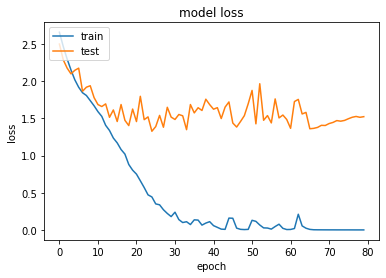

In [50]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [52]:
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("cnn_model")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
acc: 58.61%


In [0]:
lb = LabelEncoder()
test_valid_lb = np_utils.to_categorical(lb.fit_transform(y_f_test))
test_valid = np.expand_dims(X_f_test, axis=2)

In [54]:
preds = loaded_model.predict(test_valid, 
                         batch_size=16, 
                         verbose=1)

432/432 [==============================] - 1s 3ms/step


In [0]:

predictions = (lb.inverse_transform((preds.argmax(axis=1).astype(int).flatten())))


In [0]:

actualvalues = (lb.inverse_transform((test_valid_lb.argmax(axis=1).astype(int).flatten())))

In [57]:
from sklearn.metrics import classification_report
import numpy as np
print(classification_report(predictions, actualvalues))

                  precision    recall  f1-score   support

    female_angry       0.65      0.65      0.65        31
     female_calm       0.53      0.61      0.57        28
  female_disgust       0.34      0.45      0.39        22
  female_fearful       0.50      0.50      0.50        26
    female_happy       0.52      0.49      0.50        35
  female_neutral       0.67      0.27      0.38        30
      female_sad       0.52      0.48      0.50        27
female_surprised       0.60      0.60      0.60        30
      male_angry       0.68      0.74      0.71        23
       male_calm       0.55      0.75      0.63        24
    male_disgust       0.50      0.89      0.64        19
    male_fearful       0.43      0.50      0.46        26
      male_happy       0.52      0.43      0.47        28
    male_neutral       0.33      0.25      0.29        24
        male_sad       0.42      0.29      0.34        28
  male_surprised       0.72      0.74      0.73        31

        accu

In [58]:


preddf = pd.DataFrame({'predictedvalues': predictions})
actualdf = pd.DataFrame({'actualvalues': actualvalues})
finaldf = actualdf.join(preddf)
finaldf[50:70]


,actualvalues,predictedvalues
50,male_fearful,male_happy
51,female_calm,female_calm
52,male_neutral,male_neutral
53,male_angry,male_angry
54,male_surprised,male_surprised
55,female_calm,female_calm
56,female_surprised,female_surprised
57,female_calm,female_calm
58,male_disgust,male_disgust
59,female_neutral,female_neutral


In [59]:
finaldf.groupby('actualvalues').count()


,predictedvalues
actualvalues,
female_angry,31
female_calm,32
female_disgust,29
female_fearful,26
female_happy,33
female_neutral,12
female_sad,25
female_surprised,30
male_angry,25


In [60]:
finaldf.groupby('predictedvalues').count()

,actualvalues
predictedvalues,
female_angry,31
female_calm,28
female_disgust,22
female_fearful,26
female_happy,35
female_neutral,30
female_sad,27
female_surprised,30
male_angry,23


In [0]:
from sklearn.metrics import confusion_matrix
c = confusion_matrix(finaldf.actualvalues, finaldf.predictedvalues)

In [62]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

NameError: ignored